In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib
%matplotlib inline

In [4]:
import champy.plot_chameleon as plt_chi
import champy.sim_chameleon as sim_chi
import champy.runs_chameleon as run_chi

# All-in-one

In [5]:
run_chi.main()

Running STAR-like simulation.
Running simulation 1/3
Running simulation 2/3
Running simulation 3/3
Plot and save.


# Run many simulations

In [22]:
kwargs_dflt = {
    "err": 1E-12,
    "n": 0.5,
    "print_par" : 1,
    "out_dir" : "../output/",
    "step": 1E-5,
}

kwargs_sims = {
    "mod" : 0,
    "Omega_m" : 1e6,
#     "c" : [4, 6, 16],
    "M200_sun" : 3E-16,
    "Ys" : 0,
    "R": 1,
    "R_eq" : [-1, 0.2, 0.5, 0.8, 1, 2]
}

In [23]:
results_serial = sim_chi.run_many_sims(kwargs_dflt, kwargs_sims, stdout=None)

Running simulation 1/6
Running simulation 2/6
Running simulation 3/6
Running simulation 4/6
Running simulation 5/6
Running simulation 6/6

Saving results


In [24]:
results_parallel = sim_chi.run_many_sims(kwargs_dflt, kwargs_sims, stdout=None, parallel=True)

Running simulation 1/6
Running simulation 2/6
Running simulation 3/6
Running simulation 4/6
Running simulation 5/6
Running simulation 6/6
Waiting for subprocesses to finish (6/6)
Saving results


# Plots

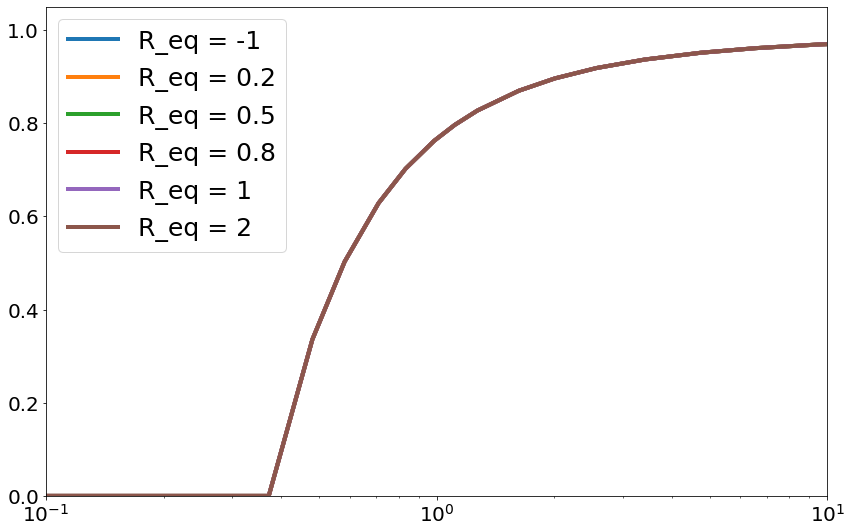

In [22]:
sim_chi.plot_simulations(results_all, p_type='forces', data_col=1, label_by='R_eq', yscale='linear', ymin=0, ymax=1.05)

In [21]:
results_all[1]['forces'][1]

array([3.192989e-15, 1.147466e-14, 2.897108e-14, 1.150109e-09,
       3.359198e-01, 5.025465e-01, 6.282610e-01, 7.020086e-01,
       7.621703e-01, 7.963361e-01, 8.270118e-01, 8.695585e-01,
       8.960459e-01, 9.183124e-01, 9.366289e-01, 9.511158e-01,
       9.609285e-01, 9.688834e-01, 9.745112e-01, 9.786535e-01,
       9.817983e-01, 9.842377e-01, 9.858963e-01, 9.872008e-01,
       9.881075e-01, 9.884018e-01, 9.877424e-01, 9.853136e-01,
       9.789496e-01, 9.635359e-01, 9.371772e-01, 8.862839e-01,
       7.934489e-01, 7.258468e-01, 7.257421e-01, 7.246952e-01,
       7.142895e-01, 6.370171e-01, 5.586977e-01, 4.750334e-01,
       3.886054e-01, 3.025876e-01, 2.211482e-01, 1.489081e-01,
       9.004178e-02, 4.712870e-02, 2.018469e-02, 6.445162e-03,
       1.293691e-03, 1.140372e-04])